In [1]:
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing,feature_selection
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
from time import time
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
review1=pd.read_csv('Review_project_sentiment_wUser.csv')

In [3]:
review1.head(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,language,text_clean,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,average_stars,NumofWords
0,1073206,JdReKgETiiJEDmshrO4TLw,pyarmAnR-i-qookQamqRTA,V2GOReqPvr8qpCC7sWfoTw,1.0,17,1,0,Just to let this car company that people DO re...,2014-03-06 12:38:52,...,en,let car company people read yelp check review ...,85.49,-0.500000,1.000000,0.120000,9,0,3.00,56
1,6229216,zL4se_Ixdcl8kvTOHCS3rg,s16-BUo-orUsELvMu5ocKg,VH0Ib9S3E-dxbQdQC4rffg,1.0,15,6,4,Mistral was the worst dining experience I have...,2010-07-22 18:08:01,...,en,mistral worst dining experience ever life bad ...,79.19,0.029864,0.502499,0.225888,1777,10,3.82,767


In [4]:
X=review1["text_clean"]

In [5]:
Y = np.array(review1["useful_level"].values)

In [6]:
## split dataset
X_train, X_test,y_train,y_test = model_selection.train_test_split(X,Y, test_size=0.1,stratify=Y)# 10% test size

In [7]:
X_train1, X_valid,y_train1,y_valid = model_selection.train_test_split(X_train,y_train, test_size=0.2,stratify=y_train)# 20% validation

In [8]:
corpus1 = X_train1

## create list of lists of unigrams
lst_corpus = []
for string in corpus1:
    lst_words = string.split() 
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

In [10]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, vector_size=300,  window=8, min_count=1, sg=1)# sg=1 skip gram/sg=0 SBOW

In [11]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train2 = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=200, padding="post", truncating="post")

In [12]:
i = 1

## list of text: ["I like this", ...]
len_txt = len(X_train1.iloc[i].split())
print("from: ", X_train1.iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train2[i])
print("to: ", X_train2[i], "| len:", len(X_train2[i]))

## vocabulary: 
print("check: ", X_train1.iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[X_train1.iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  great view great food great atmosphere keep coming back love burger tip seafood excellent youre summer order hot fudge sunday highly recommend im local lucky nice place eat drink within walking distance | len: 32
to:  [  10  679   10    8   10  388  247  249   11   53  183  454  781  252
  109  875   35  166 5694  610  314  129   19  297 1106   37    4  162
   74  498  541 1710    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0

In [13]:
# validation
corpus2 = X_valid

## create list of n-grams
lst_corpus2 = []
for string in corpus2:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus2.append(lst_grams)

In [14]:
lst_text2seq2 = tokenizer.texts_to_sequences(lst_corpus2)

## padding sequence
X_valid = kprocessing.sequence.pad_sequences(lst_text2seq2, maxlen=200,
             padding="post", truncating="post")

In [15]:
# test
corpus3 = X_test

## create list of n-grams
lst_corpus3 = []
for string in corpus3:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus3.append(lst_grams)

In [16]:
lst_text2seq3 = tokenizer.texts_to_sequences(lst_corpus3)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq3, maxlen=200,
             padding="post", truncating="post")

In [17]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [18]:
X_train2.shape

(39734, 200)

In [19]:
X_valid.shape

(9934, 200)

In [20]:
X_test.shape

(5519, 200)

In [20]:
# X_train2,y_train1
# X_valid,y_valid
# X_test,y_test

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# model evaluation Def Function

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import itertools
def model_evaluation(model1):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    t0 = time()
    model1.fit(X_train2, y_train1.astype(int))
    ## test
    predicted = model1.predict(X_valid)
    predicted_prob = model1.predict_proba(X_valid)
    print('Training Time:', time() - t0)
    print('')
    accuracy = metrics.accuracy_score(y_valid, predicted)
    auc = metrics.roc_auc_score(y_valid, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Validation Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='macro'))
    print("Precision:", precision_score(y_valid, predicted, average='macro'))
    print("Recall:", recall_score(y_valid, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='micro'))
    print("Precision:", precision_score(y_valid, predicted, average='micro'))
    print("Recall:", recall_score(y_valid, predicted, average='micro'))


    print("Detail Report:")
    print(metrics.classification_report(y_valid, predicted))

    predicted = model1.predict(X_test)
    predicted_prob = model1.predict_proba(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Test Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_test, predicted, average='macro'))
    print("Precision:", precision_score(y_test, predicted, average='macro'))
    print("Recall:", recall_score(y_test, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_test, predicted, average='micro'))
    print("Precision:", precision_score(y_test, predicted, average='micro'))
    print("Recall:", recall_score(y_test, predicted, average='micro'))

    print("Detail Report:")
    print(metrics.classification_report(y_test, predicted))
    
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    #classes = ["0","1","2"]
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
    
    ## Plot roc curve
    print("Detail Report:")
    y_test1 = label_binarize(y_test, classes=[0, 1, 2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[:, i], predicted_prob[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    colors = itertools.cycle(['blue', 'red', 'green'])
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    ## Plot precision-recall curve
    #classes = ["0","1","2"]
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        plt.plot(recall, precision, lw=1, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
    #plt.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    plt.xlim([0.0,1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision-Recall curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    

# Naive Bayes MultinomialNB

Training Time: 0.3751373291015625

Validation Set

Accuracy: 0.54
Auc: 0.6
Macros:
F1 Score: 0.43322027806159497
Precision: 0.5027243843413661
Recall: 0.4595350786620218
Micros:
F1 Score: 0.5385544594322529
Precision: 0.5385544594322529
Recall: 0.5385544594322529
Detail Report:
              precision    recall  f1-score   support

           0       0.56      0.93      0.70      4361
           1       0.50      0.29      0.37      3124
           2       0.45      0.16      0.23      2449

    accuracy                           0.54      9934
   macro avg       0.50      0.46      0.43      9934
weighted avg       0.51      0.54      0.48      9934

Test Set

Accuracy: 0.53
Auc: 0.59
Macros:
F1 Score: 0.4179299570653292
Precision: 0.4881817859739765
Recall: 0.44727083742847046
Micros:
F1 Score: 0.5272694328682732
Precision: 0.5272694328682732
Recall: 0.5272694328682732
Detail Report:
              precision    recall  f1-score   support

           0       0.55      0.92      0.69   

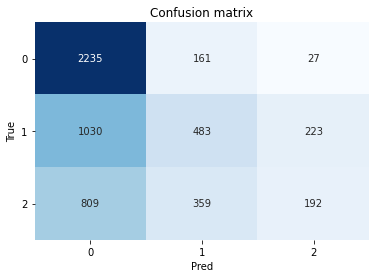

Detail Report:


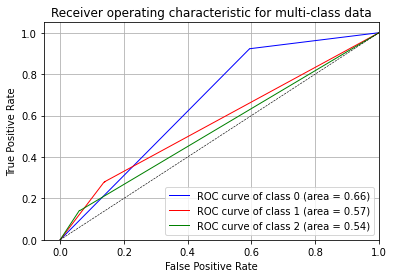

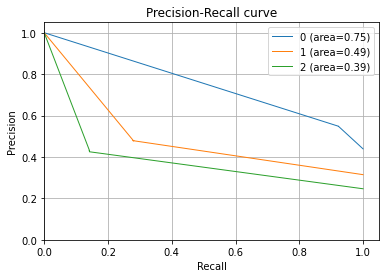

In [57]:
model_evaluation(model1=naive_bayes.MultinomialNB())

# Logistic Regression

C:\Users\Fannie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 4.996361494064331

Validation Set

Accuracy: 0.55
Auc: 0.65
Macros:
F1 Score: 0.4549747959403465
Precision: 0.4969425554244153
Recall: 0.4850532436168245
Micros:
F1 Score: 0.5504328568552446
Precision: 0.5504328568552446
Recall: 0.5504328568552446
Detail Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      4361
           1       0.45      0.56      0.50      3124
           2       0.40      0.10      0.16      2449

    accuracy                           0.55      9934
   macro avg       0.50      0.49      0.45      9934
weighted avg       0.52      0.55      0.51      9934

Test Set

Accuracy: 0.54
Auc: 0.64
Macros:
F1 Score: 0.44929781617387304
Precision: 0.492811975738805
Recall: 0.47846173856226554
Micros:
F1 Score: 0.5439391194056894
Precision: 0.5439391194056894
Recall: 0.5439391194056894
Detail Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.70    

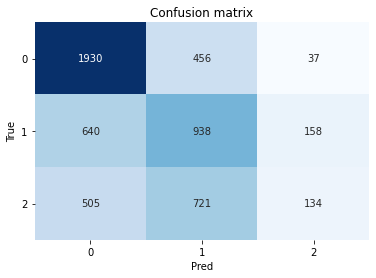

Detail Report:


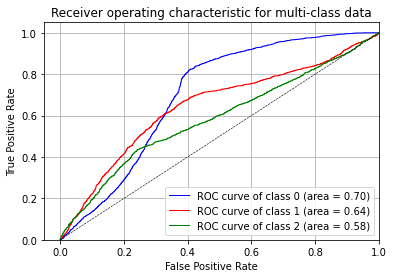

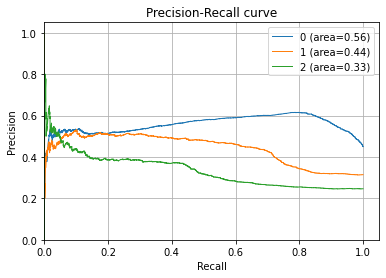

In [58]:
model_evaluation(model1=LogisticRegression(max_iter = 100))

# XGB

C:\Users\Fannie\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Time: 28.613877058029175

Validation Set

Accuracy: 0.56
Auc: 0.74
Macros:
F1 Score: 0.4990051984659738
Precision: 0.5090407741542015
Recall: 0.5071530312281646
Micros:
F1 Score: 0.5647271995168109
Precision: 0.5647271995168109
Recall: 0.5647271995168109
Detail Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      4361
           1       0.47      0.47      0.47      3124
           2       0.39      0.23      0.29      2449

    accuracy                           0.56      9934
   macro avg       0.51      0.51      0.50      9934
weighted avg       0.54      0.56      0.54      9934

Test Set

Accuracy: 0.56
Auc:

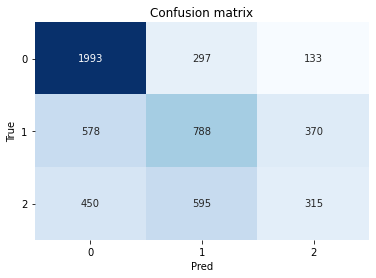

Detail Report:


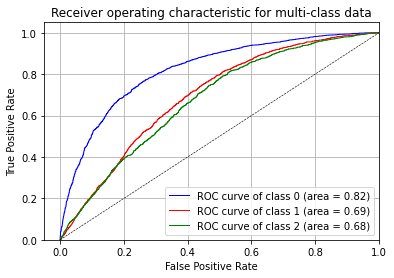

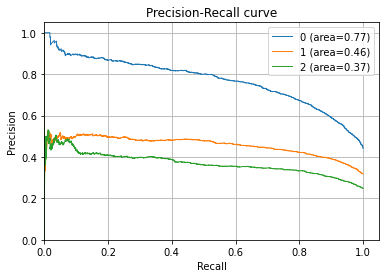

In [59]:
import xgboost as xgb
model_evaluation(model1=xgb.XGBClassifier())

# Decision Tree

Training Time: 4.89970588684082

Validation Set

Accuracy: 0.47
Auc: 0.59
Macros:
F1 Score: 0.43933173941121534
Precision: 0.43921443550755007
Recall: 0.43960979308589443
Micros:
F1 Score: 0.47211596537145156
Precision: 0.47211596537145156
Recall: 0.47211596537145156
Detail Report:
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      4361
           1       0.40      0.40      0.40      3124
           2       0.31      0.29      0.30      2449

    accuracy                           0.47      9934
   macro avg       0.44      0.44      0.44      9934
weighted avg       0.47      0.47      0.47      9934

Test Set

Accuracy: 0.47
Auc: 0.58
Macros:
F1 Score: 0.43675965859633314
Precision: 0.43673399900510335
Recall: 0.43694695277229556
Micros:
F1 Score: 0.465845261822794
Precision: 0.465845261822794
Recall: 0.465845261822794
Detail Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60

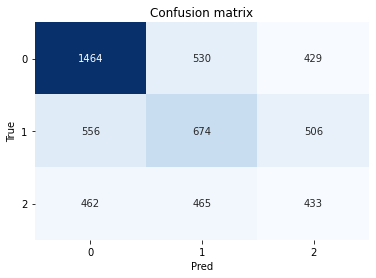

Detail Report:


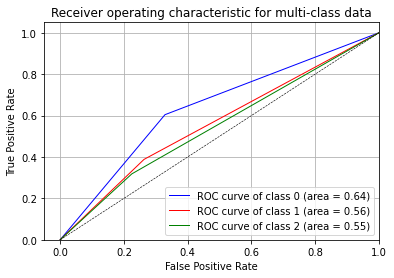

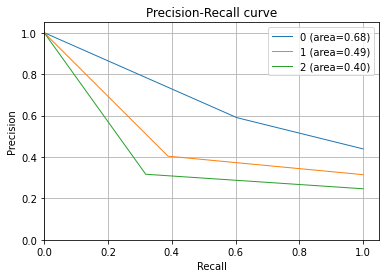

In [62]:
model_evaluation(model1=tree.DecisionTreeClassifier())

# KNN

Training Time: 494.21624302864075

Validation Set

Accuracy: 0.49
Auc: 0.63
Macros:
F1 Score: 0.37426177401808497
Precision: 0.44491911001182255
Recall: 0.4117300603225526
Micros:
F1 Score: 0.49335615059391985
Precision: 0.49335615059391985
Recall: 0.49335615059391985
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.90      0.65      4361
           1       0.46      0.23      0.30      3124
           2       0.36      0.11      0.17      2449

    accuracy                           0.49      9934
   macro avg       0.44      0.41      0.37      9934
weighted avg       0.46      0.49      0.42      9934

Test Set

Accuracy: 0.49
Auc: 0.62
Macros:
F1 Score: 0.36459301412440537
Precision: 0.4331905490629658
Recall: 0.40396397252602534
Micros:
F1 Score: 0.4857764087697047
Precision: 0.4857764087697047
Recall: 0.4857764087697047
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.90      0

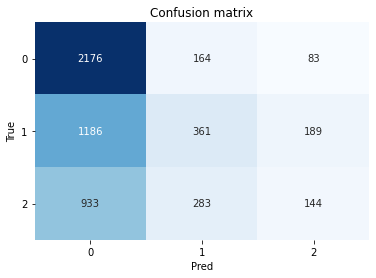

Detail Report:


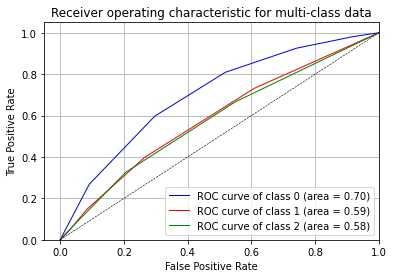

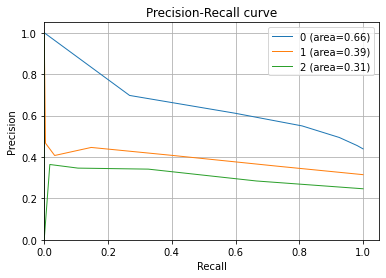

In [61]:
model_evaluation(model1=KNeighborsClassifier())

# RandomForest

Training Time: 20.690743923187256

Validation Set

Accuracy: 0.57
Auc: 0.74
Macros:
F1 Score: 0.4816158518023504
Precision: 0.5146217424712464
Recall: 0.5053250818669626
Micros:
F1 Score: 0.5707670626132474
Precision: 0.5707670626132474
Recall: 0.5707670626132474
Detail Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73      4361
           1       0.48      0.56      0.51      3124
           2       0.41      0.13      0.20      2449

    accuracy                           0.57      9934
   macro avg       0.51      0.51      0.48      9934
weighted avg       0.54      0.57      0.53      9934

Test Set

Accuracy: 0.57
Auc: 0.73
Macros:
F1 Score: 0.4785137194143736
Precision: 0.5152138002861296
Recall: 0.5012219325310836
Micros:
F1 Score: 0.5660445732922631
Precision: 0.5660445732922631
Recall: 0.5660445732922631
Detail Report:
              precision    recall  f1-score   support

           0       0.65      0.82      0.72    

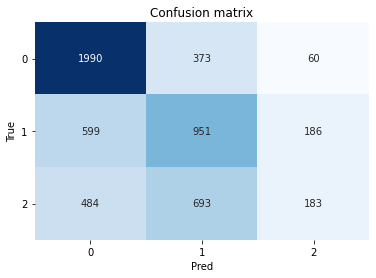

Detail Report:


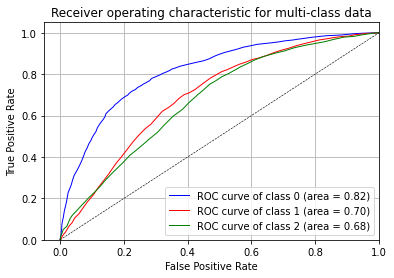

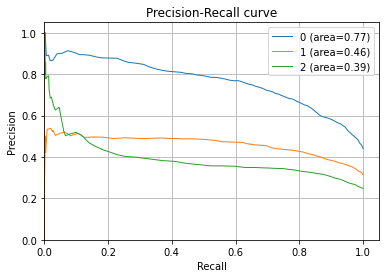

In [63]:
model_evaluation(model1=RandomForestClassifier())

# MLP

Training Time: 26.95217490196228

Validation Set

Accuracy: 0.44
Auc: 0.62
Macros:
F1 Score: 0.22385661039163463
Precision: 0.4260646323488319
Recall: 0.34100888534778734
Micros:
F1 Score: 0.4446345882826656
Precision: 0.4446345882826656
Recall: 0.4446345882826656
Detail Report:
              precision    recall  f1-score   support

           0       0.45      0.99      0.61      4361
           1       0.47      0.02      0.03      3124
           2       0.37      0.01      0.02      2449

    accuracy                           0.44      9934
   macro avg       0.43      0.34      0.22      9934
weighted avg       0.43      0.44      0.29      9934

Test Set

Accuracy: 0.44
Auc: 0.62
Macros:
F1 Score: 0.2206383630758614
Precision: 0.43177343073560914
Recall: 0.33958729631668677
Micros:
F1 Score: 0.44355861569124844
Precision: 0.44355861569124844
Recall: 0.44355861569124844
Detail Report:
              precision    recall  f1-score   support

           0       0.44      0.99      0.

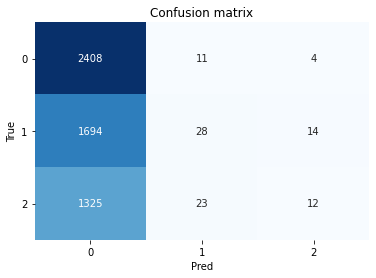

Detail Report:


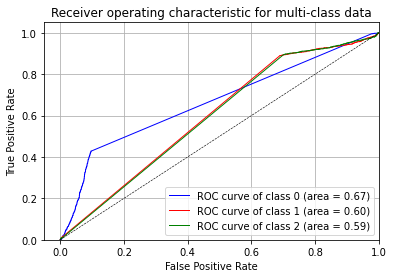

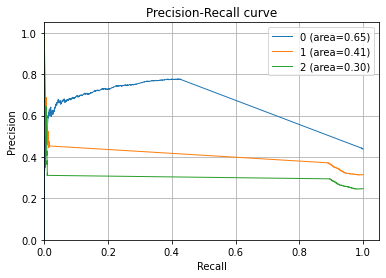

In [64]:
from sklearn.neural_network import MLPClassifier
model_evaluation(model1=MLPClassifier(random_state=1, max_iter=500))

Train 2 best models: XGB and random forest

random forest

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid)
# Fit the random search model
rf_random.fit(X_train2, y_train1.astype(int))

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [68]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

Training Time: 174.61451768875122

Validation Set

Accuracy: 0.58
Auc: 0.75
Macros:
F1 Score: 0.4764116448222322
Precision: 0.5436230248780007
Recall: 0.5105761714842958
Micros:
F1 Score: 0.5788202134084961
Precision: 0.5788202134084961
Recall: 0.5788202134084961
Detail Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      4361
           1       0.48      0.60      0.53      3124
           2       0.49      0.10      0.16      2449

    accuracy                           0.58      9934
   macro avg       0.54      0.51      0.48      9934
weighted avg       0.56      0.58      0.53      9934

Test Set

Accuracy: 0.57
Auc: 0.74
Macros:
F1 Score: 0.4694756220233733
Precision: 0.5365509665116389
Recall: 0.5030239029031925
Micros:
F1 Score: 0.5711179561514768
Precision: 0.5711179561514768
Recall: 0.5711179561514768
Detail Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73    

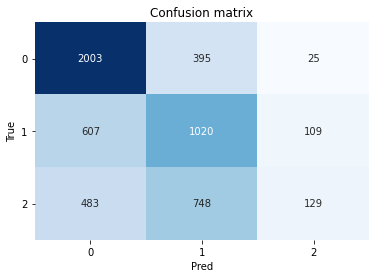

Detail Report:


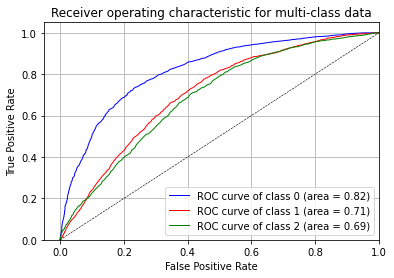

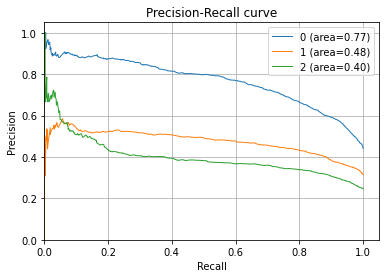

In [72]:
model_evaluation(model1=RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1, 
                                              max_features = 'sqrt', max_depth=50, bootstrap = False))